 __**Author: Aime Munezero**__

_**Purpose of this work**_

> Building a simple - Two Layer neural network from scratch and train it on a simple dataset of gray-scale images of hand-drawn digits (from 0 to 9).

_**Within this work, the flow of how data gets trained in a Neural Network has been portrayed below:**_

    * The inputs (data) movement from layer to layer (after it has been fed into the neural network) until the output has been obtained.
    * The error computation after the output has been obtained, .
    * Adjustment of parameters (Weight & bias) computed from substracting the derivative of the error with respect to the parameter itself.


In [2]:
#Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
np.array(data).shape

(42000, 785)

In [6]:
data.pixel200.unique()

array([  0, 255,  45,  25, 111, 222,  51, 150, 219, 240,  24, 254, 253,
        21,  13, 198, 137,  90, 249, 105, 157, 116,  76, 185, 138, 128,
        63, 117,  87,   5,  14,  18,   8,  22,  62,  67,  57,  81,  68,
       158,  31, 247, 193, 119, 252,  37, 223, 139,  11, 100,  94, 106,
         9, 190, 202,   4,  60, 218,  92,  28, 236, 168,  35, 169, 125,
       191, 171, 206,  32, 107, 194,  10, 122, 203, 154,   1, 245,  82,
       197, 130, 159,  77,  55,   7, 136,  43, 141, 134,  73, 248,  30,
        64,  91,   6, 126,  36, 101, 161, 109, 123,  85,  80, 221, 205,
       233,  96, 251,  42, 250, 210,  48, 181,  95, 200, 211,  19, 152,
        58, 226,  26, 166,  70, 121, 201,  56,  75,  72,   3,  41, 227,
       102, 113,  52, 118, 224, 231,  29,  86,  17, 163,  15, 244, 178,
        20, 133,  27, 220, 246, 142, 208, 184, 173, 207, 155, 215,  34,
        16, 149,  69, 129,  59,  46,   2, 230, 235,  99, 124, 151,  38,
       174, 143, 132,  79, 238,  44, 147,  89,  78, 108,  12, 12

In [7]:
#Putting data into Numpy array
data = np.array(data)

In [8]:
#Checking the data shape
data.shape

(42000, 785)

In [9]:
m,n = data.shape

In [10]:
#Shuffling data to avoid the model to be biased
np.random.shuffle(data)

In [11]:
data[0:1000].shape

(1000, 785)

In [12]:
data[0:1000].T.shape

(785, 1000)

In [13]:
#Slicing the development set which I will be using to test my model while hyper parameter tuning
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

In [14]:
#Y_train and X_train

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [15]:
#Initializing parameters for weights with their corresponding shape, and substracting 0.5 to make them 
#as small as possible 
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [16]:
#Computing the forward propagation, which will be taking the initialized parameters as 
#input
# Here, as I have to layers, there will also be considered two activation function, which are ReLU and Softmax  

#Initializing the RELU activation function

def ReLU(Z):
    return np.maximum(Z, 0)

#Initializing the softmax activation function

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

#The derivative of RELU

def ReLU_deriv(Z):
    return Z > 0 #Return 1 if Z > 0 and 0 if not


def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1,X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [17]:
#Computing the onehot hot encoding for the dependent variable as it contains various numbers

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [18]:
#Computing the backward propagation

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * np.dot(dZ2,A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = np.dot(W2.T,dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * np.dot(dZ1,X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [19]:
#Updating parameters using gradient descent by substracting the original weight with the product of the learning rate and  derivative of the Error with respect to the training parameter

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    
    return W1, b1, W2, b2

In [20]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


In [21]:
# Updated parameters using gradient Descent

def gradient_descent(X, Y, learning_rate, iterations):
    
    W1, b1, W2, b2 = init_params()
    pred =[]
    iterat_ =[]
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 10 == 0:
            print("Iteration: ", i)
            iterat_.append(i)
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            pred.append(acc)
            print(acc)
            
    plt.plot(iterat_,pred)
    
    return W1, b1, W2, b2


Iteration:  0
[8 7 7 ... 7 7 9] [1 7 3 ... 1 4 1]
0.13878048780487806
Iteration:  10
[8 3 7 ... 7 7 9] [1 7 3 ... 1 4 1]
0.16429268292682928
Iteration:  20
[1 3 3 ... 7 7 9] [1 7 3 ... 1 4 1]
0.20190243902439026
Iteration:  30
[1 7 3 ... 7 7 1] [1 7 3 ... 1 4 1]
0.29421951219512193
Iteration:  40
[1 4 3 ... 7 7 1] [1 7 3 ... 1 4 1]
0.343609756097561
Iteration:  50
[1 4 6 ... 1 7 1] [1 7 3 ... 1 4 1]
0.3917560975609756
Iteration:  60
[1 4 6 ... 1 9 1] [1 7 3 ... 1 4 1]
0.4324390243902439
Iteration:  70
[1 4 6 ... 1 9 1] [1 7 3 ... 1 4 1]
0.4677317073170732
Iteration:  80
[1 4 6 ... 1 9 1] [1 7 3 ... 1 4 1]
0.5011951219512195
Iteration:  90
[1 4 6 ... 1 9 1] [1 7 3 ... 1 4 1]
0.5320731707317073
Iteration:  100
[1 4 6 ... 1 9 1] [1 7 3 ... 1 4 1]
0.5602926829268293
Iteration:  110
[1 4 6 ... 1 9 1] [1 7 3 ... 1 4 1]
0.5879756097560975
Iteration:  120
[1 4 3 ... 1 9 1] [1 7 3 ... 1 4 1]
0.611780487804878
Iteration:  130
[1 4 3 ... 1 9 1] [1 7 3 ... 1 4 1]
0.6312926829268293
Iteration:  140

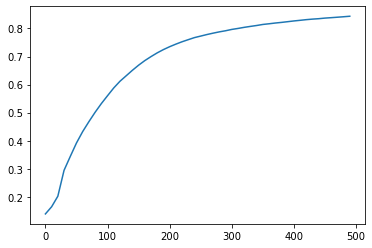

In [26]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1,500)

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


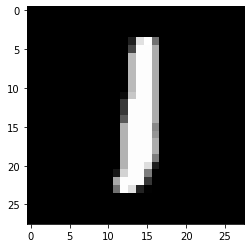

Prediction:  [7]
Label:  7


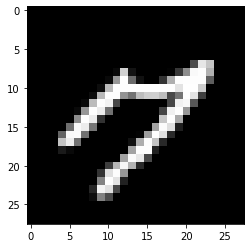

Prediction:  [3]
Label:  3


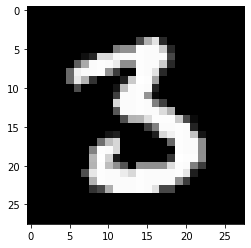

Prediction:  [3]
Label:  3


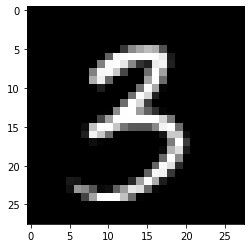

In [24]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)